# Tutorial 1: getting started with a 3D Laplace 

Let us consider the following weak formulation

$$\int_{\Omega} N_i N_j + \nabla N_i \cdot \nabla N_j ~d\Omega$$

In the case where $\Omega$ is the unit cube, we should expect the GLT symbol

$$
\mathfrak{m}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{m}_p(\theta_3) + \mathfrak{m}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{s}_p(\theta_3) + \mathfrak{m}_p(\theta_1) \mathfrak{s}_p(\theta_2) \mathfrak{m}_p(\theta_3) + \mathfrak{s}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{m}_p(\theta_3)
$$


In [1]:
# ... we first import the glt_symbol function
from gelato.expression import glt_symbol
# ...

In [2]:
# ... a discretization is defined as a dictionary
discretization = {"n_elements": [16, 16, 16], \
                  "degrees": [3, 3, 3]}
# ...

A glt symbol can be created in two ways:
- from a string (called a normal form)
- from a bilinear form, as provided by Vale
Note that in the first case, you must provide also the dimension of the manifold.
the **glt_symbol** has many options (we refer the user to its documentation). For example, you can decide for the symbol to *evaluated* or not, using the argument **evaluate**

In [3]:
# ... create a glt symbol from a string without evaluation
expr = "Ni * Nj + Ni_x * Nj_x + Ni_y * Nj_y + Ni_z * Nj_z"
expr = glt_symbol(expr, \
                  dim=3, \
                  discretization=discretization, \
                  evaluate=False)
# ...

We get a *sympy* expression, that we can manipulate like any other *sympy*
expression. Let's print it

In [4]:
print expr

m1*m2*m3 + m1*m2*s3 + m1*m3*s2 + m2*m3*s1


Good, but that's not readable for a human. You can now convert this expression to latex using


In [5]:
from IPython.display import Math;
from sympy import latex;

In [6]:
Math(latex(expr))

<IPython.core.display.Math object>

For pretty printing, you may need the **glt_latex** function

In [7]:
from gelato.printing.latex import glt_latex;
Math(glt_latex(expr))

<IPython.core.display.Math object>

Let's now **evaluate** our symbol (in the symbolic sens) in order to do some diagnostics

In [8]:
# ... create a glt symbol from a string and evaluate it
expr = "Ni * Nj + Ni_x * Nj_x + Ni_y * Nj_y + Ni_z * Nj_z"
expr = glt_symbol(expr, \
                  dim=3, \
                  discretization=discretization, \
                  evaluate=True)
# ...

We recall that the eigenvalues of the matrix associated to our weak formulation can be *approximated* by a *uniform sampling* of the symbol

In [9]:
from gelato.expression import glt_approximate_eigenvalues
eig = glt_approximate_eigenvalues(expr, discretization)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

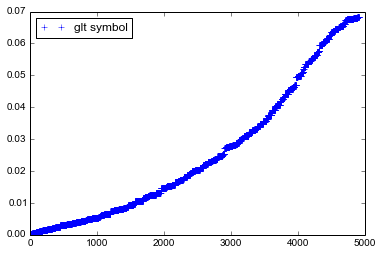

In [11]:
t = eig
t.sort()
plt.plot(t, "+b", label="glt symbol")
plt.legend(loc=2);

We will see later, another way of plotting these eigenvalues.
Another interesting feature of our symbol, is **numerical evaluation**. For this, you need to call the **glt_lambdify** function

In [12]:
from gelato.expression import glt_lambdify

f = glt_lambdify(expr, dim=3)

Now $f$ is a function that you can evaluate numerically.

In [13]:
from numpy import pi
f(0.1,0.1,0.1,pi, pi, pi)

0.00029129561923951064